In [79]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [80]:
df = pd.read_csv('Amazon Sales data.csv')
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [81]:
df.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [82]:
df.shape

(100, 14)

In [83]:
df.size

1400

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [85]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [86]:
df.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [87]:
df.isna().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [88]:
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')


In [89]:
df.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

In [90]:
df.isnull().sum()

Region             0
Country            0
Item Type          0
Sales Channel      0
Order Priority     0
Order Date        34
Order ID           0
Ship Date         36
Units Sold         0
Unit Price         0
Unit Cost          0
Total Revenue      0
Total Cost         0
Total Profit       0
dtype: int64

In [91]:
mean_ship_date = df['Ship Date'].mean()
mean_order_date = df['Order Date'].mean()

df['Ship Date'].fillna(mean_ship_date, inplace = True)
df['Order Date'].fillna(mean_order_date, inplace = True)

In [92]:
df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [93]:
df.duplicated().sum()

0

## Highest Sale Revenue by Region

In [94]:
group_data = df.groupby(df['Region'])['Total Revenue'].sum()

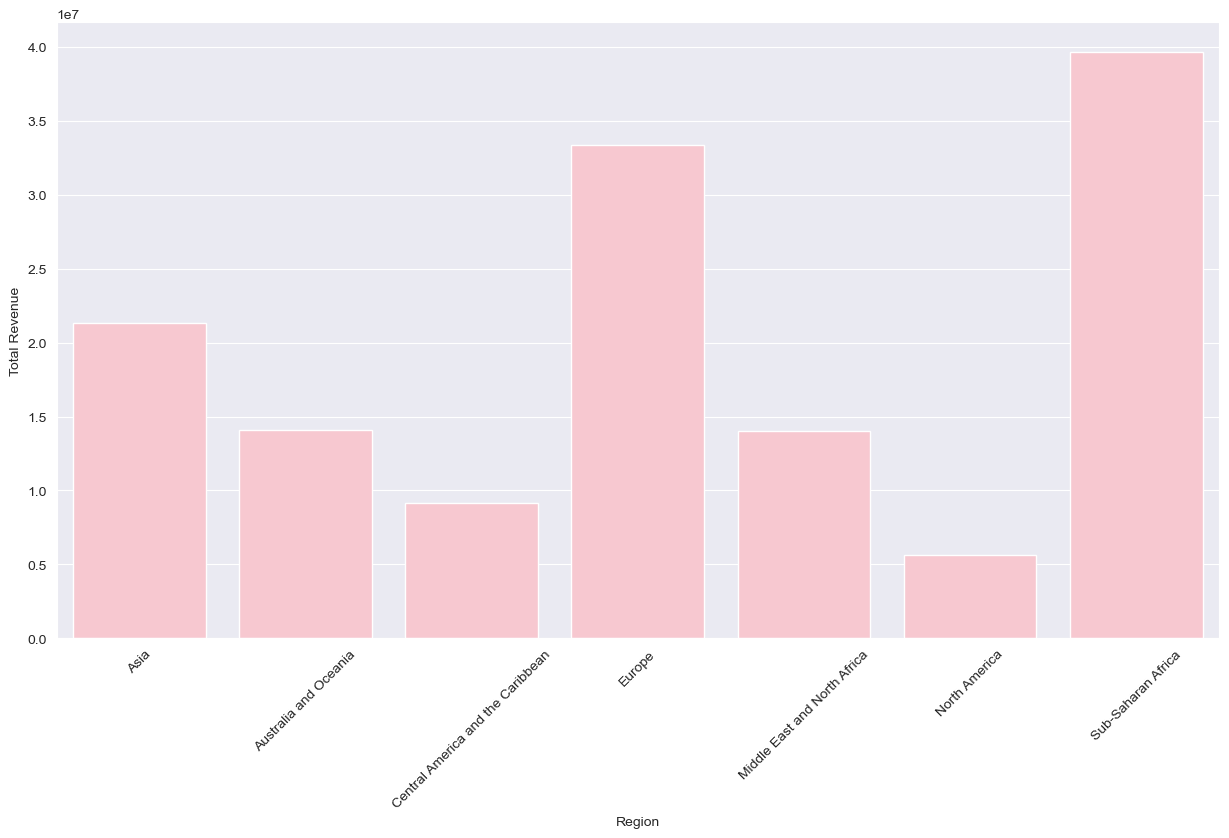

In [95]:
plt.figure(figsize = (15,8))
sns.barplot(data = group_data, color = 'pink') 
plt.xticks(rotation = 45);

#### Sub Saharan African Region has the highest sale revenue.

## Average unit cost for each item type

In [96]:
avg_unit_price = df.groupby(df['Item Type'])['Unit Price'].mean()
avg_unit_cost = df.groupby(df['Item Type'])['Unit Cost'].mean()

avg_values = pd.DataFrame({'Average Unit Price': avg_unit_price,
                              'Average Unit Cost': avg_unit_cost})
avg_values

,Average Unit Price,Average Unit Cost
Item Type,,
Baby Food,255.28,159.42
Beverages,47.45,31.79
Cereal,205.70,117.11
Clothes,109.28,35.84
Cosmetics,437.20,263.33
Fruits,9.33,6.92
Household,668.27,502.54
Meat,421.89,364.69
Office Supplies,651.21,524.96


####  House Hold items have the maximum avg. unit price and office supplies have the highest avg. cost.

## Country with Highest Total Profit

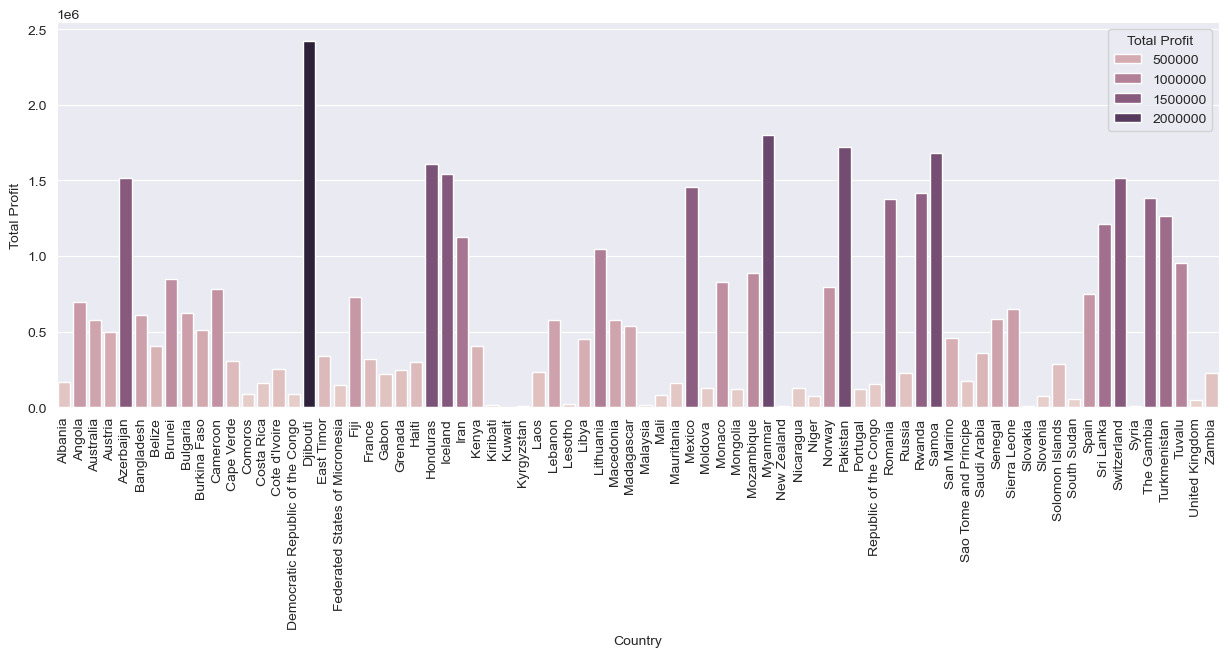

In [97]:
group_data2 = df.groupby('Country')['Total Profit'].sum()

sns.set_style('darkgrid')
plt.figure(figsize = (15,5))
sns.barplot( x = group_data2.index, y =group_data2, hue = group_data2)
plt.xticks(rotation = 90)
plt.show();

#### Djibouti is the country with highest profit

## Sale Channel Order Priority Distribution

In [98]:
sale_priority = df.groupby(['Sales Channel', 'Order Priority'])['Order Priority'].value_counts()

In [99]:
sale_priority

Sales Channel  Order Priority
Offline        C                 13
               H                 17
               L                 12
               M                  8
Online         C                  9
               H                 13
               L                 15
               M                 13
Name: count, dtype: int64

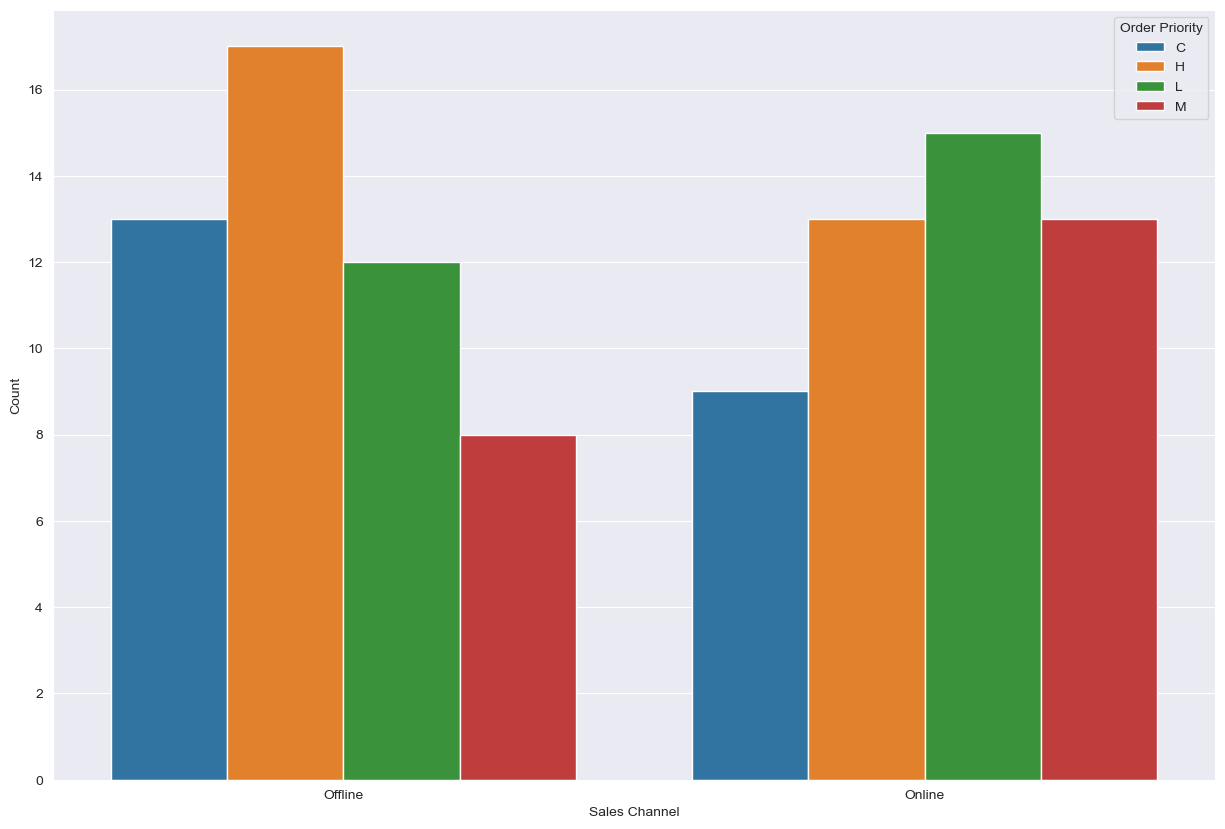

In [100]:
sale_channel = df.groupby(['Sales Channel','Order Priority'])['Order Priority'].count()

# reset the index to convert the grouped data into a DataFrame

sale_channel = sale_channel.reset_index(name = 'Count')
plt.figure(figsize = (15,10))
sns.barplot(sale_channel, x = 'Sales Channel', y = 'Count', hue = 'Order Priority');

## Items Types with Highest and Lowest Total Sales

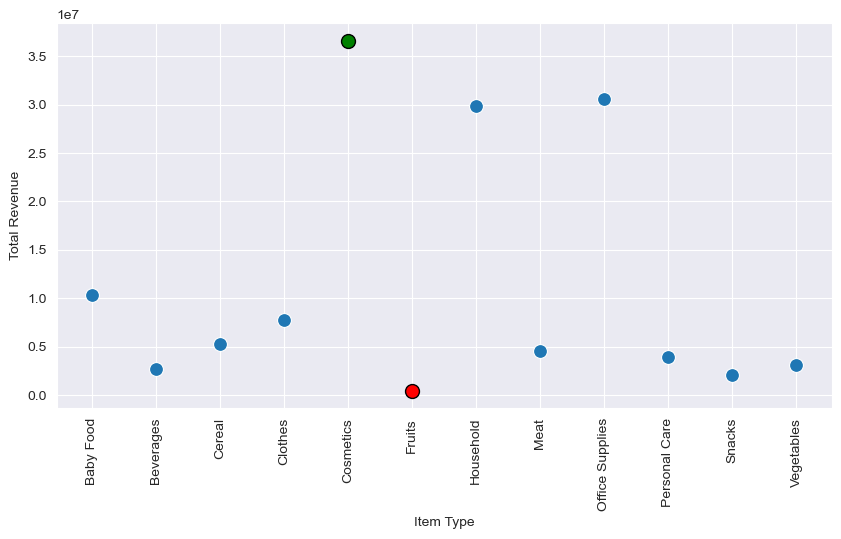

In [121]:
item_type = df.groupby(df['Item Type'])['Total Revenue'].sum()

plt.figure(figsize = (10,5))
sns.scatterplot(x = item_type.index, y = item_type, s = 100)

max_index = item_type.idxmax()
min_index = item_type.idxmin()

plt.scatter(x = max_index, y = item_type[max_index], s =100, color = 'green',
           edgecolor = 'blacK')
plt.scatter(x = min_index, y = item_type[min_index], s = 100, color = 'red',
            edgecolor = 'black')
plt.xticks(rotation = 90)
plt.show();


#### Cosmetics have the Highest Total Sales Revenue
#### Fruits have the Lowest Sales Revenue

## Order Priority by  Regions

In [133]:
diff_region = df.groupby(df['Region'])['Order Priority'].value_counts().reset_index(name = 'Priority Count')
diff_region

,Region,Order Priority,Priority Count
0,Asia,L,4
1,Asia,H,3
2,Asia,M,2
3,Asia,C,2
4,Australia and Oceania,H,5
5,Australia and Oceania,C,4
6,Australia and Oceania,L,1
7,Australia and Oceania,M,1
8,Central America and the Caribbean,L,2
9,Central America and the Caribbean,H,2


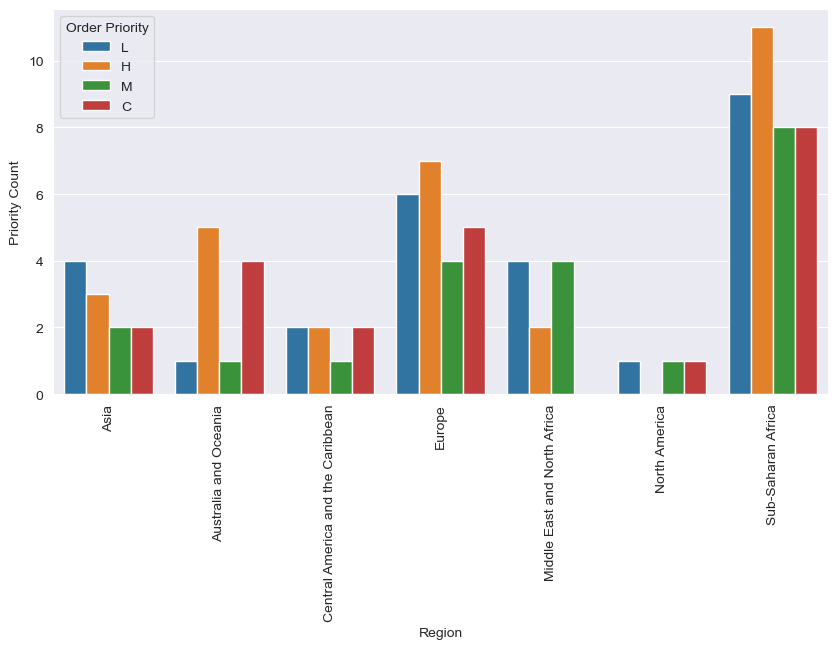

In [135]:
plt.figure(figsize = (10,5))

sns.barplot(data = diff_region, x = 'Region', y = 'Priority Count', hue = 'Order Priority')
plt.xticks(rotation = 90)
plt.show()

## Correlation Matrix

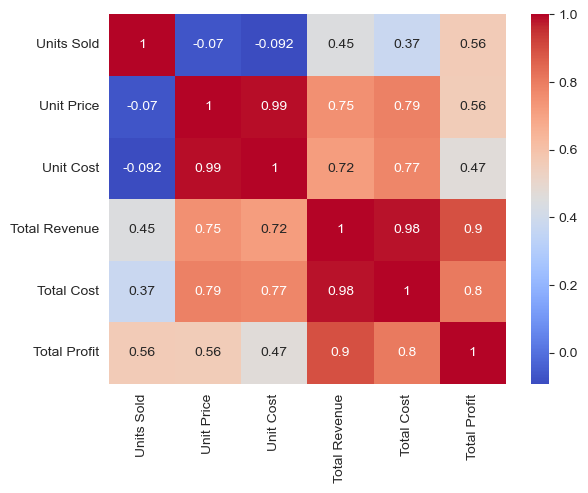

In [144]:
corr_df = df[['Units Sold','Unit Price','Unit Cost','Total Revenue',
             'Total Cost', 'Total Profit']]
df_corr = corr_df.corr()

sns.heatmap(df_corr, annot = True, cmap = 'coolwarm');

## Seasonal Trends

In [146]:
month_names = {1: 'JAN',
             2: 'FEB',
             3: 'MAR',
             4: 'APR',
             5: 'MAY',
             6: 'JUN',
             7: 'JUL',
             8: 'AUG',
             9: 'SEP',
             10: 'OCT',
             11: 'NOV',
             12: 'DEC'}
monthly_sales = df.groupby(df['Order Date'].dt.month)['Total Revenue'].sum()
monthly_sales.index = monthly_sales.index.map(month_names)

monthly_sales

Order Date
JAN     8846293.82
FEB     5884465.12
MAR     2028407.92
APR     8406818.15
MAY    11064739.47
JUN     4045279.41
JUL    10191773.17
AUG      672685.87
SEP     5294357.85
OCT    62012607.20
NOV    12269225.29
DEC     6632115.04
Name: Total Revenue, dtype: float64

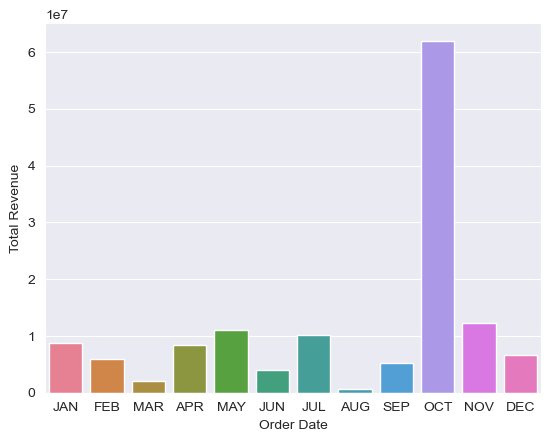

In [149]:
sns.barplot(x = monthly_sales.index, y = monthly_sales, hue = monthly_sales.index)
plt.show();

## Units Sold across Countries

In [151]:
unit_countries = df.groupby(df['Country'])['Units Sold'].sum().reset_index(name = 'Unit Sold')
pd.set_option('display.max_rows',None)
unit_countries

,Country,Unit Sold
0,Albania,2269
1,Angola,4187
2,Australia,12995
3,Austria,2847
4,Azerbaijan,9255
5,Bangladesh,8263
6,Belize,5498
7,Brunei,6708
8,Bulgaria,5660
9,Burkina Faso,8082


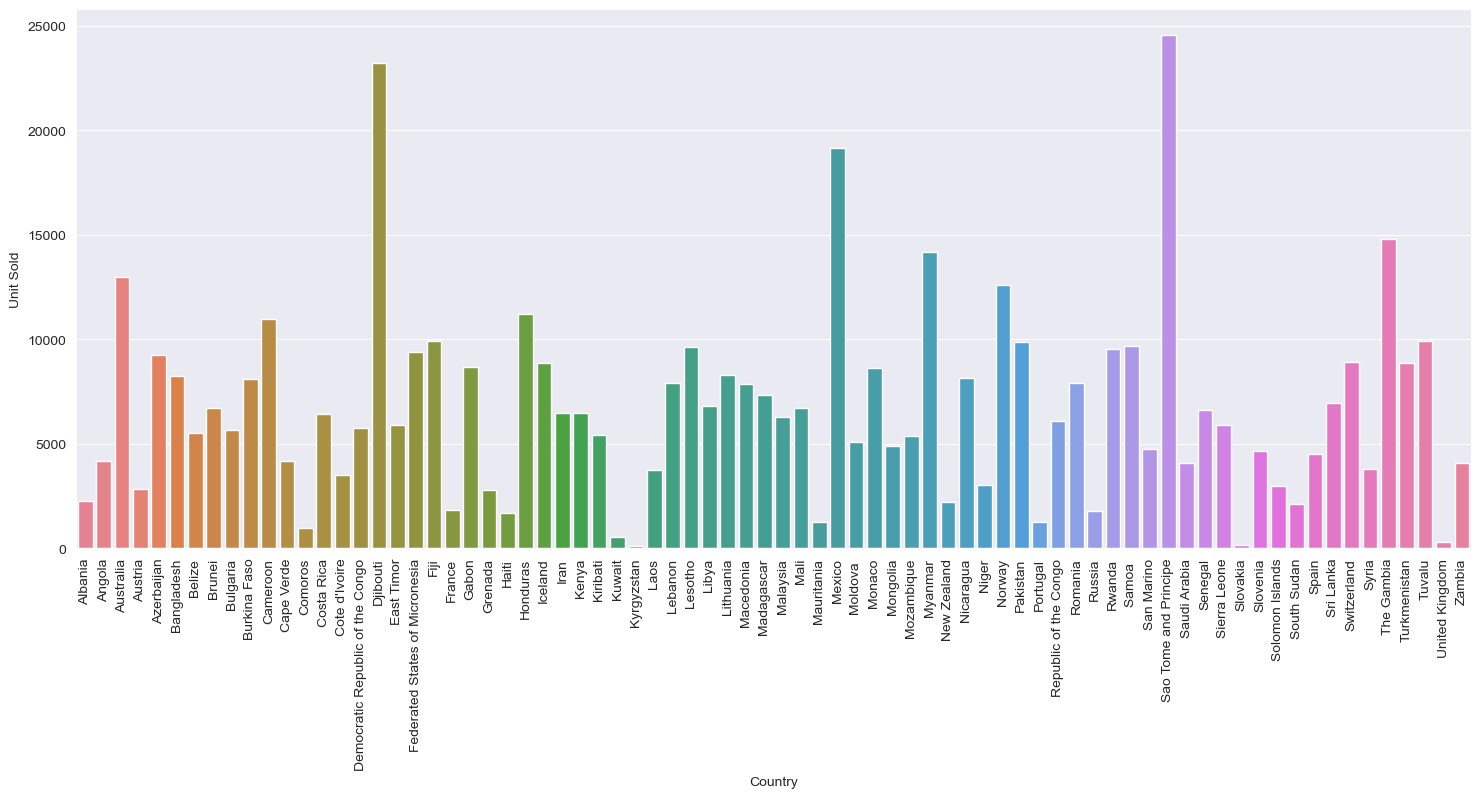

In [157]:
plt.figure(figsize = (18,7))
sns.barplot(data = unit_countries, x = 'Country', y = 'Unit Sold', hue = 'Country')
plt.xticks(rotation = 90);

## Distribution of Unit Price by Item

In [158]:
unit_price = df.groupby(df['Item Type'])['Unit Price'].sum().reset_index(name = 'Unit Price')
unit_price

,Item Type,Unit Price
0,Baby Food,1786.96
1,Beverages,379.60
2,Cereal,1439.90
3,Clothes,1420.64
4,Cosmetics,5683.60
5,Fruits,93.30
6,Household,6014.43
7,Meat,843.78
8,Office Supplies,7814.52
9,Personal Care,817.30


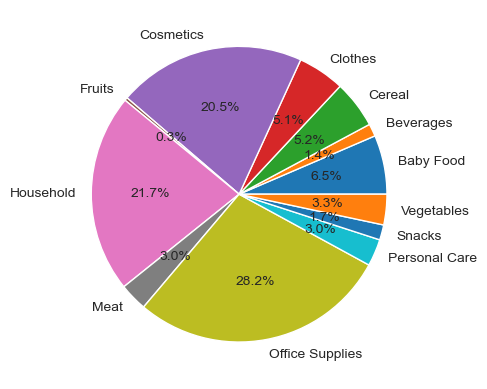

In [162]:
plt.pie(x = unit_price['Unit Price'], 
       labels = unit_price['Item Type'],
       autopct = '%1.1f%%');

## Highest average unit price by Sale Channel

In [164]:
highest_ = df.groupby(df['Sales Channel'])['Unit Price'].mean().reset_index(name = 'new')
highest_

,Sales Channel,new
0,Offline,310.7206
1,Online,242.8020


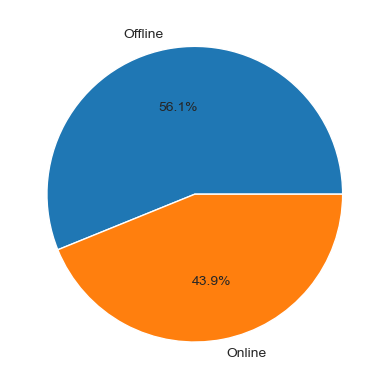

In [166]:
plt.pie(x = highest_['new'], labels = highest_['Sales Channel'],
       autopct = '%1.1f%%');

## Checking Outliers in Cost Distribution

In [173]:
q1 = df['Total Cost'].quantile(0.25)
q3 = df['Total Cost'].quantile(0.75)

iqr = q3 - q1

lower_fence = q1 - 1.5*iqr
upper_fence = q3 + 1.5*iqr

outliers = df[(df['Total Cost']< lower_fence) | (df['Total Cost'] > upper_fence)].reset_index(drop = True)
outliers

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Processing Time
0,Central America and the Caribbean,Honduras,Household,Offline,H,2013-10-11 01:49:05.454545408,522840487,2017-02-13 00:00:00,8974,668.27,502.54,5997054.98,4509793.96,1487261.02,1220 days 22:10:54.545454592
1,Asia,Myanmar,Household,Offline,H,2015-01-16 00:00:00.000000000,177713572,2013-10-31 15:22:30,8250,668.27,502.54,5513227.50,4145955.00,1367272.50,-442 days +15:22:30
2,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24 00:00:00.000000000,166460740,2010-11-17 00:00:00,8287,651.21,524.96,5396577.27,4350343.52,1046233.75,24 days 00:00:00


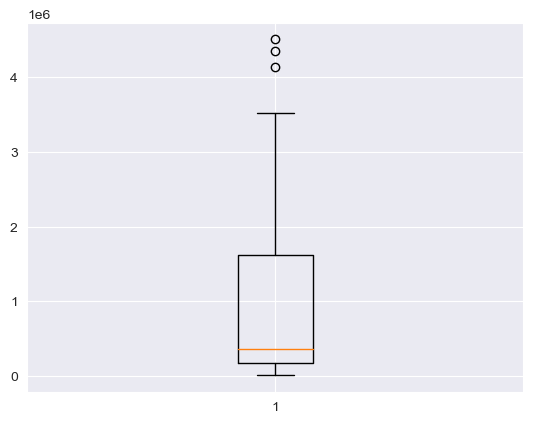

In [174]:
plt.boxplot(df['Total Cost']);

## Profit by Item Types

In [176]:
total_pf = df.groupby(df['Item Type'])['Total Profit'].sum().reset_index(name = 'Total Profit')
total_pf

,Item Type,Total Profit
0,Baby Food,3886643.70
1,Beverages,888047.28
2,Cereal,2292443.43
3,Clothes,5233334.40
4,Cosmetics,14556048.66
5,Fruits,120495.18
6,Household,7412605.71
7,Meat,610610.00
8,Office Supplies,5929583.75
9,Personal Care,1220622.48
